**Импорт тестового датасета с изображениями**

In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(train_images.ndim)
print(train_images.shape)

3
(60000, 28, 28)


In [4]:
train_images.dtype

dtype('uint8')

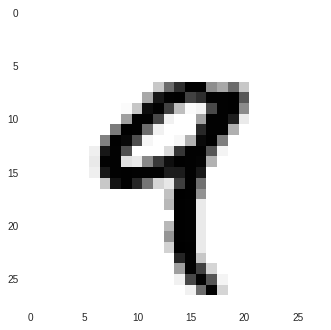

In [5]:
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.grid()
plt.show()

In [6]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


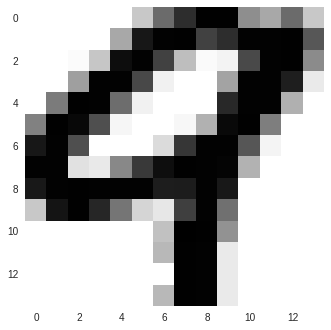

In [7]:
#14x14
digit = train_images[4,7:-7,7:-7]
plt.imshow(digit, cmap=plt.cm.binary)
plt.grid()
plt.show()

In [0]:
n=0
batch = train_images[128*n : 128*(n+1)]

**3.4. Классицифкация отзывов к фильмам: пример бинарной классификации**

In [0]:
from keras.datasets import imdb

In [11]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


In [12]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [13]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [14]:
max(max(sequence) for sequence in train_data)

9999

In [15]:
word_index = imdb.get_word_index()
reverse_word_index = dict (
    (value, key) for (key, value) in word_index.items() )
decoder_review = ' '.join(
    [reverse_word_index.get(i-3,'?') for i in train_data[0]] )
# т.к. индексвы 0, 1 и 2 зарезервированы для "отступ", "начало" и "неизвестно"

1646592/1641221 [==============================] - 0s 0us/step


In [0]:
# кодирование последовательностей целых чисел в бинарную матрицу

import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros(( len(sequences) , dimension ))
  for i, sequences in enumerate(sequences):
    results[i, sequences] = 1
  return results

In [17]:
%%time
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

CPU times: user 1.48 s, sys: 2.65 s, total: 4.13 s
Wall time: 4.13 s


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 179us/step - loss: 0.5046 - acc: 0.7876 - val_loss: 0.3774 - val_acc: 0.8704
Epoch 2/20
15000/15000 [==============================] - 2s 143us/step - loss: 0.2991 - acc: 0.9046 - val_loss: 0.3001 - val_acc: 0.8896
Epoch 3/20
15000/15000 [==============================] - 2s 143us/step - loss: 0.2173 - acc: 0.9283 - val_loss: 0.3079 - val_acc: 0.8716
Epoch 4/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.1747 - acc: 0.9440 - val_loss: 0.2824 - val_acc: 0.8846
Epoch 5/20
15000/15000 [==============================] - 2s 144us/step - loss: 0.1421 - acc: 0.9541 - val_loss: 0.2855 - val_acc: 0.8859
Epoch 6/20
15000/15000 [==============================] - 2s 143us/step - loss: 0.1148 - acc: 0.9651 - val_loss: 0.3126 - val_acc: 0.8785
Epoch 7/20
15000/15000 [==============================] - 2s 143us/step - loss: 0.0977 - acc: 0.9709 - val_loss: 0.3131 - 

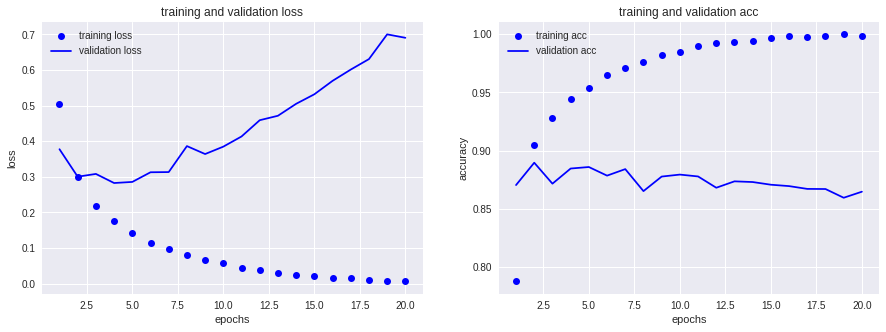

CPU times: user 57.4 s, sys: 1.97 s, total: 59.4 s
Wall time: 44.1 s


In [18]:
%%time

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense( 16, activation='relu', input_shape=(10000,) ) )
model.add(layers.Dense( 16, activation='relu' ) )
model.add(layers.Dense( 1, activation='sigmoid' ) )

# вариант 1
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# # вариант 2: настроить параметры вручную
# from keras import optimizers
# from keras import losses
# from keras import metrics

# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#              loss=losses.binary_crossentropy,
#              metrics=[metrics.binary_accuracy])

# разбиваем на обучающую 10000 образцов и проверочную выборку
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# обучение модели
history= model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data= (x_val, y_val) )

history_dict = history.history
history_dict.keys()
# ['val_loss', 'val_acc', 'loss', 'acc']


import matplotlib.pyplot as plt

# графики
plt.figure(figsize=(15, 5))

plt.subplot(121)
# график точности
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']

epochs = range(1, (len(acc_values))+1 )

plt.plot(epochs, loss_values, 'bo', label = 'training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'validation loss')
plt.title( 'training and validation loss' )
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(122)
# график потерь
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, (len(acc_values))+1 )

plt.plot(epochs, acc_values, 'bo', label = 'training acc')
plt.plot(epochs, val_acc_values, 'b', label = 'validation acc')
plt.title( 'training and validation acc' )
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

In [19]:
%%time

# из графика видим переобучение на 20 эпохах, оставим только 4 эпохи

model = models.Sequential()
model.add(layers.Dense( 16, activation='relu', input_shape=(10000,) ) )
model.add(layers.Dense( 16, activation='relu' ) )
model.add(layers.Dense( 1, activation='sigmoid' ) )

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train,
           y_train,
           epochs=4,
           batch_size=512)

results = model.evaluate(x_test, y_test)

print('\n', results, '\n')

Epoch 1/4
25000/25000 [==============================] - 3s 105us/step - loss: 0.4739 - acc: 0.8221
Epoch 2/4
25000/25000 [==============================] - 3s 103us/step - loss: 0.2675 - acc: 0.9090
Epoch 3/4
25000/25000 [==============================] - 3s 102us/step - loss: 0.2029 - acc: 0.9287
Epoch 4/4
25000/25000 [==============================] - 2s 93us/step

 [0.31275658314704896, 0.87568] 

CPU times: user 17.2 s, sys: 622 ms, total: 17.8 s
Wall time: 13.3 s


In [20]:
# построим предикт на новых данных

model.predict(x_test)

array([[0.15958671],
       [0.9998449 ],
       [0.3795305 ],
       ...,
       [0.07986593],
       [0.04867497],
       [0.44790718]], dtype=float32)

Train on 25000 samples, validate on 10000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 195us/step - loss: 0.4243 - acc: 0.8145 - val_loss: 0.2908 - val_acc: 0.8870
Epoch 2/20
25000/25000 [==============================] - 4s 172us/step - loss: 0.2377 - acc: 0.9089 - val_loss: 0.1549 - val_acc: 0.9522
Epoch 3/20
25000/25000 [==============================] - 4s 171us/step - loss: 0.1845 - acc: 0.9304 - val_loss: 0.1173 - val_acc: 0.9635
Epoch 4/20
25000/25000 [==============================] - 4s 171us/step - loss: 0.1518 - acc: 0.9433 - val_loss: 0.0931 - val_acc: 0.9738
Epoch 5/20
25000/25000 [==============================] - 4s 176us/step - loss: 0.1226 - acc: 0.9552 - val_loss: 0.0717 - val_acc: 0.9805
Epoch 6/20
25000/25000 [==============================] - 4s 176us/step - loss: 0.0942 - acc: 0.9666 - val_loss: 0.0498 - val_acc: 0.9885
Epoch 7/20
25000/25000 [==============================] - 4s 170us/step - loss: 0.0715 - acc: 0.9754 - val_loss: 0.0346 - 

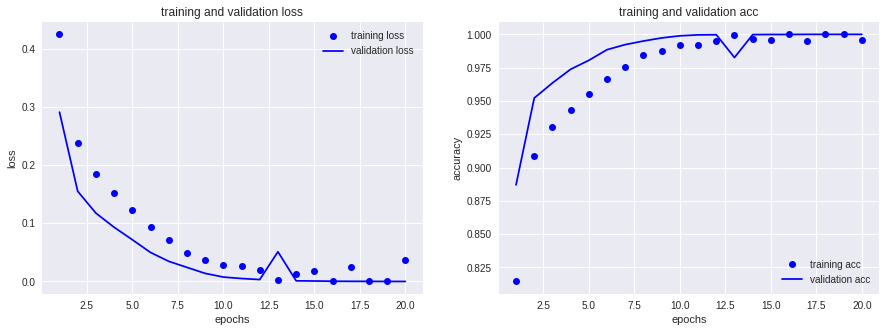

25000/25000 [==============================] - 3s 125us/step

 [1.081839636527896, 0.85696] 

CPU times: user 2min 10s, sys: 4.13 s, total: 2min 14s
Wall time: 1min 30s


In [29]:
%%time

from keras import models
from keras import layers

# попробуем поиграться с параметрами
model = models.Sequential()
model.add(layers.Dense( 64, activation='relu', input_shape=(10000,) ) )
model.add(layers.Dense( 64, activation='relu' ) )
model.add(layers.Dense( 1, activation='sigmoid' ) )

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train,
           y_train,
           epochs=20,
           batch_size=512,
           validation_data= (x_val, y_val) )

history_dict = history.history
history_dict.keys()

print('\n\n')

# графики
plt.figure(figsize=(15, 5))

plt.subplot(121)
# график точности
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']

epochs = range(1, (len(acc_values))+1 )

plt.plot(epochs, loss_values, 'bo', label = 'training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'validation loss')
plt.title( 'training and validation loss' )
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(122)
# график потерь
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, (len(acc_values))+1 )

plt.plot(epochs, acc_values, 'bo', label = 'training acc')
plt.plot(epochs, val_acc_values, 'b', label = 'validation acc')
plt.title( 'training and validation acc' )
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()


# точность на неизвестных данных
results = model.evaluate(x_test, y_test)

print('\n', results, '\n')

In [23]:
history_dict.keys()

dict_keys(['loss', 'acc'])

In [0]:
# import os
# import tensorflow as tf
# from tensorflow.keras.models import Model

# # Мы будем создавать одинаковую модель два раза:
# #   первый вариант модели для TPU, на котором будем обучать,
# #   а второй для CPU, где будем распознавать объекты.

# def create_model():
  
#   model = Model.Sequential()
#   model.add(layers.Dense( 32, activation='relu', input_shape=(10000,) ) )
#   model.add(layers.Dense( 16, activation='relu' ) )
#   model.add(layers.Dense( 1, activation='sigmoid' ) )

# #   model.compile(optimizer='rmsprop',
# #                loss='binary_crossentropy',
# #                metrics=['accuracy'])

#   model.compile(
#       optimizer=tf.train.AdamOptimizer(0.001),
#       loss=tf.keras.losses.categorical_crossentropy,
#       metrics=['sparse_categorical_accuracy'])
    
#   return model

# cpu_model = create_model()

# # # Конвертируем нейросеть на Keras в модель для TPU

# # # Для начала нужно узнать, где находится доступный нам TPU.
# # # На платформе Colaboratory это можно сделать следующей командой:
# # TPU_WORKER = 'grpc://' + os.environ['COLAB_TPU_ADDR']

# # # Теперь можно получить модель для TPU с помощью функции keras_to_tpu_model:
# # tf.logging.set_verbosity(tf.logging.INFO)
# # tpu_model = tf.contrib.tpu.keras_to_tpu_model(
# #     cpu_model,
# #     strategy=tf.contrib.tpu.TPUDistributionStrategy(
# #         tf.contrib.cluster_resolver.TPUClusterResolver(TPU_WORKER)))

**3.5.1. Набор данных в Reuters**

In [0]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print( train_data.shape )
print( test_data.shape )

print(train_data[1])

In [0]:
word_index = reuters.get_word_index()

def index2words(i):
  reverse_word_index = dict (
    (value, key) for (key, value) in word_index.items() )
  decoder_review = ' '.join(
    [reverse_word_index.get(i-3,'?') for i in train_data[i]] )
  
  return decoder_review
  # т.к. индексвы 0, 1 и 2 зарезервированы для "отступ", "начало" и "неизвестно"

In [44]:
index2words(2)

'? shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for one split effective january 6 1987 per share amounts are calculated after preferred stock dividends loss continuing operations for the qtr 1986 includes gains of sale of investments in ? corp of 14 mln dlrs and associated companies of 4 189 000 less writedowns of investments in national ? inc of 11 8 mln and ? corp of 15 6 mln reuter 3'

In [0]:
# кодирование последовательностей целых чисел в бинарную матрицу

import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros(( len(sequences) , dimension ))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

x_train = vectorize_sequences( train_data )
x_test = vectorize_sequences( test_data )

In [54]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [61]:
# прямое кодирование категорий

def to_one_hot (labels, dimension=46):
  results = np.zeros(( len(labels) , dimension ))
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

print(train_labels[100])
print(one_hot_train_labels[100])

20
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [62]:
# этот способ уже реализован в Keras

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

print(train_labels[100])
print(one_hot_train_labels[100])

20
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [70]:
%%time

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense( 64, activation='relu', input_shape=(10000,) ) )
model.add(layers.Dense( 64, activation='relu' ) )
model.add(layers.Dense( 46, activation='softmax' ) )

# вариант 1
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# разбиваем на обучающую 1000 образцов и проверочную выборку
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# обучение модели
history= model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data= (x_val, y_val) )

history_dict = history.history
history_dict.keys()

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 268us/step - loss: 2.5078 - acc: 0.4935 - val_loss: 1.6753 - val_acc: 0.6470
Epoch 2/20
7982/7982 [==============================] - 1s 176us/step - loss: 1.3943 - acc: 0.7038 - val_loss: 1.3157 - val_acc: 0.7000
Epoch 3/20
7982/7982 [==============================] - 1s 174us/step - loss: 1.0593 - acc: 0.7749 - val_loss: 1.1358 - val_acc: 0.7580
Epoch 4/20
7982/7982 [==============================] - 1s 175us/step - loss: 0.8387 - acc: 0.8256 - val_loss: 1.0254 - val_acc: 0.7880
Epoch 5/20
7982/7982 [==============================] - 1s 176us/step - loss: 0.6647 - acc: 0.8617 - val_loss: 0.9663 - val_acc: 0.7920
Epoch 6/20
7982/7982 [==============================] - 1s 172us/step - loss: 0.5350 - acc: 0.8885 - val_loss: 0.9001 - val_acc: 0.8180
Epoch 7/20
7982/7982 [==============================] - 1s 172us/step - loss: 0.4230 - acc: 0.9103 - val_loss: 0.9264 - val_acc: 0.7940


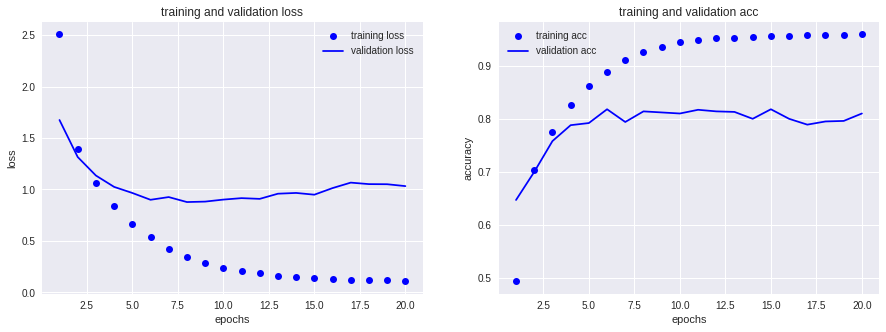

2246/2246 [==============================] - 0s 135us/step

 [1.2059174186930737, 0.7787177203918076] 



In [71]:
# графики
plt.figure(figsize=(15, 5))

plt.subplot(121)
# график точности
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']

epochs = range(1, (len(acc_values))+1 )

plt.plot(epochs, loss_values, 'bo', label = 'training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'validation loss')
plt.title( 'training and validation loss' )
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(122)
# график потерь
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, (len(acc_values))+1 )

plt.plot(epochs, acc_values, 'bo', label = 'training acc')
plt.plot(epochs, val_acc_values, 'b', label = 'validation acc')
plt.title( 'training and validation acc' )
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

In [72]:
# после 9 эпохи начинается переобучение

model = models.Sequential()
model.add(layers.Dense( 64, activation='relu', input_shape=(10000,) ) )
model.add(layers.Dense( 64, activation='relu' ) )
model.add(layers.Dense( 46, activation='softmax' ) )

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# разбиваем на обучающую 1000 образцов и проверочную выборку
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# обучение модели
history= model.fit(partial_x_train,
                   partial_y_train,
                   epochs=9,
                   batch_size=512,
                   validation_data= (x_val, y_val) )

# точность на неизвестных данных
results = model.evaluate(x_test, one_hot_test_labels)

print('\n', results, '\n')

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 265us/step - loss: 2.5387 - acc: 0.5227 - val_loss: 1.6741 - val_acc: 0.6550
Epoch 2/9
7982/7982 [==============================] - 1s 166us/step - loss: 1.3718 - acc: 0.7120 - val_loss: 1.2754 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 173us/step - loss: 1.0149 - acc: 0.7796 - val_loss: 1.1307 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 173us/step - loss: 0.7990 - acc: 0.8239 - val_loss: 1.0534 - val_acc: 0.7610
Epoch 5/9
7982/7982 [==============================] - 1s 176us/step - loss: 0.6404 - acc: 0.8627 - val_loss: 0.9756 - val_acc: 0.7940
Epoch 6/9
7982/7982 [==============================] - 1s 174us/step - loss: 0.5129 - acc: 0.8916 - val_loss: 0.9096 - val_acc: 0.8130
Epoch 7/9
7982/7982 [==============================] - 1s 173us/step - loss: 0.4119 - acc: 0.9143 - val_loss: 0.8924 - val_acc: 0.8200
Epoch 8

In [75]:
# точность случайного решения

import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hist_array = np.array( test_labels ) == np.array( test_labels_copy )
float ( np.sum(hist_array) / len(test_labels) )

0.19278717720391808

In [79]:
predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [80]:
# вектор с вероятностями к принадлежности к каждому из классов
predictions[0]

array([9.80283221e-06, 8.17320833e-05, 2.50202374e-05, 9.72354710e-01,
       1.62799936e-02, 1.10673433e-07, 9.48292291e-05, 2.91635733e-05,
       3.31744831e-03, 2.03397485e-06, 3.04404057e-05, 1.42975687e-03,
       5.47872442e-05, 2.58514683e-05, 4.51877986e-06, 1.74847064e-05,
       1.00797380e-03, 1.95626897e-04, 2.77358602e-04, 1.22618885e-03,
       7.59438728e-04, 4.55007568e-04, 7.15605483e-06, 5.81167915e-05,
       1.21557259e-05, 3.22128442e-04, 2.50854509e-06, 2.54914394e-05,
       7.36277889e-06, 1.01596415e-04, 3.35810124e-04, 1.94030115e-04,
       1.24085445e-05, 3.94501476e-05, 3.44511900e-05, 2.11816332e-05,
       1.58490133e-04, 4.52446584e-05, 8.80648513e-05, 2.99275591e-04,
       3.66973109e-05, 4.68548009e-04, 1.84685609e-06, 3.36379198e-05,
       5.70920156e-06, 9.29642465e-06], dtype=float32)

In [81]:
np.sum(predictions[0])

0.99999994

In [83]:
# наибольший элемент, элемент с наибольшей вероятностью - это предсказанный класс

np.argmax(predictions[0])

3

Вариант 2. Кодирование категорий в целые числа

In [0]:
y_train = np.array( train_labels )
y_test = np.array( test_labels )

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 304us/step - loss: 2.6363 - acc: 0.5395 - val_loss: 1.7316 - val_acc: 0.6360
Epoch 2/20
7982/7982 [==============================] - 1s 168us/step - loss: 1.4140 - acc: 0.7102 - val_loss: 1.3000 - val_acc: 0.7140
Epoch 3/20
7982/7982 [==============================] - 1s 169us/step - loss: 1.0476 - acc: 0.7799 - val_loss: 1.1251 - val_acc: 0.7470
Epoch 4/20
7982/7982 [==============================] - 1s 168us/step - loss: 0.8248 - acc: 0.8274 - val_loss: 1.0177 - val_acc: 0.7860
Epoch 5/20
7982/7982 [==============================] - 1s 169us/step - loss: 0.6535 - acc: 0.8649 - val_loss: 0.9527 - val_acc: 0.7950
Epoch 6/20
7982/7982 [==============================] - 1s 167us/step - loss: 0.5177 - acc: 0.8919 - val_loss: 0.8974 - val_acc: 0.8170
Epoch 7/20
7982/7982 [==============================] - 1s 166us/step - loss: 0.4134 - acc: 0.9141 - val_loss: 0.8841 - val_acc: 0.8200


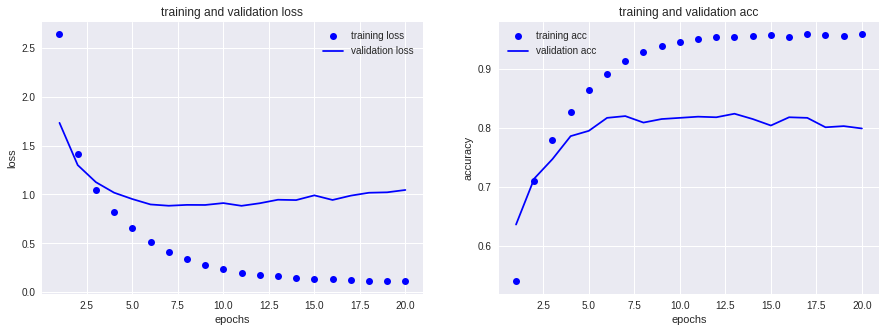

In [87]:
# меняем функцию потерь на sparse_categorical_crossentropy

model = models.Sequential()
model.add(layers.Dense( 64, activation='relu', input_shape=(10000,) ) )
model.add(layers.Dense( 64, activation='relu' ) )
model.add(layers.Dense( 46, activation='softmax' ) )

model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# разбиваем на обучающую 1000 образцов и проверочную выборку
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

# обучение модели
history= model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data= (x_val, y_val) )

history_dict = history.history
history_dict.keys()

# графики
plt.figure(figsize=(15, 5))

plt.subplot(121)
# график точности
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']

epochs = range(1, (len(acc_values))+1 )

plt.plot(epochs, loss_values, 'bo', label = 'training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'validation loss')
plt.title( 'training and validation loss' )
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(122)
# график потерь
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, (len(acc_values))+1 )

plt.plot(epochs, acc_values, 'bo', label = 'training acc')
plt.plot(epochs, val_acc_values, 'b', label = 'validation acc')
plt.title( 'training and validation acc' )
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

In [88]:
# после 6 эпохи начинается переобучение

model = models.Sequential()
model.add(layers.Dense( 64, activation='relu', input_shape=(10000,) ) )
model.add(layers.Dense( 64, activation='relu' ) )
model.add(layers.Dense( 46, activation='softmax' ) )

model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# разбиваем на обучающую 1000 образцов и проверочную выборку
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

# обучение модели
history= model.fit(partial_x_train,
                   partial_y_train,
                   epochs=6,
                   batch_size=512,
                   validation_data= (x_val, y_val) )

# точность на неизвестных данных
results = model.evaluate(x_test, y_test)

print('\n', results, '\n')

Train on 7982 samples, validate on 1000 samples
Epoch 1/6
7982/7982 [==============================] - 2s 242us/step - loss: 2.5633 - acc: 0.5189 - val_loss: 1.6967 - val_acc: 0.6360
Epoch 2/6
7982/7982 [==============================] - 1s 170us/step - loss: 1.3902 - acc: 0.7132 - val_loss: 1.2857 - val_acc: 0.7310
Epoch 3/6
7982/7982 [==============================] - 1s 173us/step - loss: 1.0229 - acc: 0.7824 - val_loss: 1.1212 - val_acc: 0.7740
Epoch 4/6
7982/7982 [==============================] - 1s 171us/step - loss: 0.8018 - acc: 0.8306 - val_loss: 1.0490 - val_acc: 0.7680
Epoch 5/6
7982/7982 [==============================] - 1s 173us/step - loss: 0.6356 - acc: 0.8697 - val_loss: 0.9515 - val_acc: 0.8020
Epoch 6/6
2246/2246 [==============================] - 0s 139us/step

 [0.967796616753827, 0.7827248441674087] 



Эксперименты с примером one hot encoding

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 346us/step - loss: 3.0183 - acc: 0.4521 - val_loss: 2.3359 - val_acc: 0.6060
Epoch 2/20
7982/7982 [==============================] - 1s 172us/step - loss: 1.9230 - acc: 0.6597 - val_loss: 1.7130 - val_acc: 0.6630
Epoch 3/20
7982/7982 [==============================] - 1s 171us/step - loss: 1.4400 - acc: 0.7142 - val_loss: 1.4553 - val_acc: 0.6950
Epoch 4/20
7982/7982 [==============================] - 1s 172us/step - loss: 1.1895 - acc: 0.7418 - val_loss: 1.3294 - val_acc: 0.6990
Epoch 5/20
7982/7982 [==============================] - 1s 171us/step - loss: 1.0192 - acc: 0.7667 - val_loss: 1.2531 - val_acc: 0.7060
Epoch 6/20
7982/7982 [==============================] - 1s 174us/step - loss: 0.8809 - acc: 0.7922 - val_loss: 1.1744 - val_acc: 0.7370
Epoch 7/20
7982/7982 [==============================] - 1s 170us/step - loss: 0.7617 - acc: 0.8176 - val_loss: 1.1213 - val_acc: 0.7430


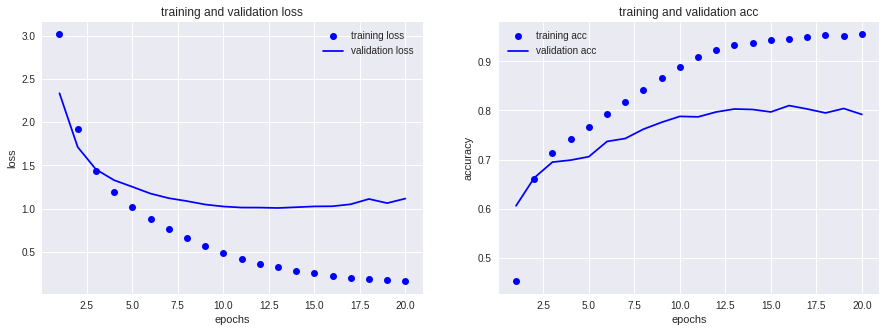


 [1.5751215148375486, 0.7479964381387376] 

2246/2246 [==============================] - 0s 151us/step


In [95]:
model = models.Sequential()
model.add(layers.Dense( 64, activation='relu', input_shape=(10000,) ) )
model.add(layers.Dense( 16, activation='relu' ) )
# model.add(layers.Dense( 64, activation='relu' ) )
# model.add(layers.Dense( 64, activation='relu' ) )
model.add(layers.Dense( 46, activation='softmax' ) )

# вариант 1
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# разбиваем на обучающую 1000 образцов и проверочную выборку
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# обучение модели
history= model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data= (x_val, y_val) )

history_dict = history.history
history_dict.keys()

# графики
plt.figure(figsize=(15, 5))

plt.subplot(121)
# график точности
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']

epochs = range(1, (len(acc_values))+1 )

plt.plot(epochs, loss_values, 'bo', label = 'training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'validation loss')
plt.title( 'training and validation loss' )
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(122)
# график потерь
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, (len(acc_values))+1 )

plt.plot(epochs, acc_values, 'bo', label = 'training acc')
plt.plot(epochs, val_acc_values, 'b', label = 'validation acc')
plt.title( 'training and validation acc' )
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

print('\n', results, '\n')

# точность на неизвестных данных
results = model.evaluate(x_test, one_hot_test_labels)

**3.6. Предсказание цен на дома: пример регрессии**

In [ ]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

print( train_data.shape )
print( test_data.shape )
print('\n')

print(train_data[1])
print('\n')

print( train_targets[:10])

In [0]:
# нормализация данных

mean = train_data.mean(axis=0)
train_data -= mean

std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [103]:
print(train_data[1])

[-0.40342651  2.99178419 -1.33391162 -0.25683275 -1.21518188  1.89434613
 -1.91036058  1.24758524 -0.85646254 -0.34843254 -1.71818909  0.43190599
 -1.32920239]


In [104]:
%%time

from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense( 64, activation='relu', input_shape=(train_data.shape[1],) ) )
  model.add(layers.Dense( 64, activation='relu' ) )
  model.add(layers.Dense( 1, activation='relu' ) )

  model.compile(optimizer='rmsprop',
               loss='mse',
               metrics=['mae'])
  return model

CPU times: user 19 µs, sys: 0 ns, total: 19 µs
Wall time: 22.4 µs


*Оценка решения методом перекрестной проверки по K блокам - K-fold cross val*

In [116]:
%%time

import numpy as np

k = 4
num__val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
  
  print('processing fold #',i)
  
  val_data = train_data[ i * num__val_samples : (i+1) * num__val_samples ]
  val_targets = train_targets[ i * num__val_samples : (i+1) * num__val_samples ]
  
  partial_train_data = np.concatenate(
    [train_data[ : i * num__val_samples ],
     train_data[ (i+1) * num__val_samples: ]],
        axis=0)
  
  partial_train_targets = np.concatenate(
    [train_targets[ : i * num__val_samples ],
     train_targets[ (i+1) * num__val_samples: ]],
        axis=0)
  
  model = build_model()
  
  model.fit(partial_train_data,
           partial_train_targets,
           epochs = num_epochs,
           batch_size = 1,
           verbose = 0)
  
  val_mse, val_mae = model.evaluate (val_data,val_targets, verbose = 0)
  all_scores.append(val_mae)
  
print(all_scores)
print(np.mean(all_scores))

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
[1.9901380208459232, 2.5296636808036577, 2.676436138625192, 2.3118659092648195]
2.377025937384898
CPU times: user 2min 46s, sys: 6.38 s, total: 2min 53s
Wall time: 2min 19s


In [125]:
%%time

num_epochs = 500
all_mae_histories = []

for i in range(k):
  
  print('processing fold #',i)
  
  val_data = train_data[ i * num__val_samples : (i+1) * num__val_samples ]
  val_targets = train_targets[ i * num__val_samples : (i+1) * num__val_samples ]
  
  partial_train_data = np.concatenate(
    [train_data[ : i * num__val_samples ],
     train_data[ (i+1) * num__val_samples: ]],
        axis=0)
  
  partial_train_targets = np.concatenate(
    [train_targets[ : i * num__val_samples ],
     train_targets[ (i+1) * num__val_samples: ]],
        axis=0)
  
  model = build_model()
  
  history = model.fit(partial_train_data,
           partial_train_targets,
           epochs = num_epochs,
           batch_size = 1,
           verbose = 0)
  mae_history = history.history['mean_absolute_error']
  all_mae_histories.append(mae_history)

average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

average_mae_history

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
[10.76897919886183, 3.711028643567176, 2.999863253961695, 2.696285105381075, 2.555678401449726, 2.419833599930943, 2.357642695848698, 2.3153178762681415, 2.2314990483494874, 2.182971165911986, 2.1510131685647242, 2.1321759385244285, 2.1254726978811886, 2.098690119710299, 2.0819715131627454, 2.05062992305252, 2.0359557961473373, 2.0393044344662834, 2.0063371833401544, 1.991836934199821, 1.9472867049793205, 1.947695287147371, 1.9267614159253563, 1.9004066505841297, 1.9268683155771136, 1.8723736950273169, 1.8777923641031724, 1.8393892492398176, 1.8490828889431339, 1.828283142138629, 1.8548081633281395, 1.7970776703491462, 1.7996654604921247, 1.7658700941026013, 1.7847421755491704, 1.7850605815944105, 1.7605047827900047, 1.7389008117587652, 1.7226186251089517, 1.7216160917046046, 1.7133668796850903, 1.6866679315519804, 1.6995161146220594, 1.6675060206513987, 1.6774632387822215, 1.6669709877212449, 1.65033156525

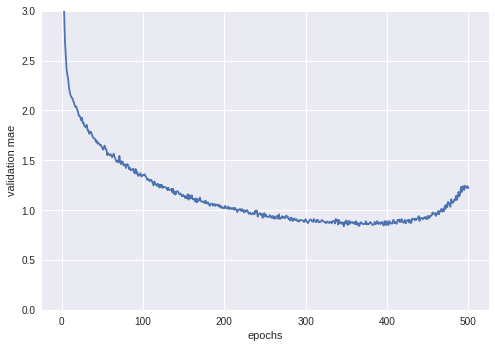

In [145]:
import matplotlib.pyplot as plt

# график точности
plt.plot( range(1,len(average_mae_history)+1), average_mae_history)
plt.xlabel('epochs')
plt.ylabel('validation mae')

# plt.xlim((0,500))
plt.ylim((0,3))
plt.show()

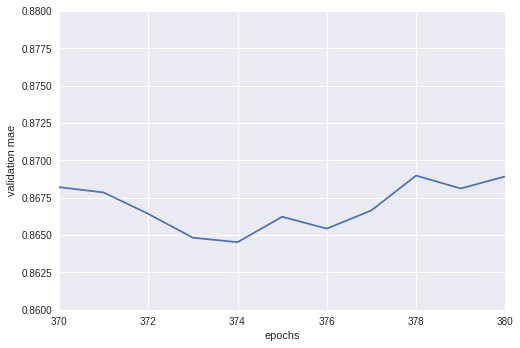

In [151]:
# опустим первые 10 замеров
# заменим каждую mae оценку экспотенциальным скользящим средним по предыдущим оценкам,
# чтобы получить более гладку кривую

def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append( previous * factor + point * (1-factor) )
    else:
      smoothed_points.append( point )
  return smoothed_points

smooth_mae_history = smooth_curve (average_mae_history[10:])

plt.plot( range(1,len(smooth_mae_history)+1), smooth_mae_history)
plt.xlabel('epochs')
plt.ylabel('validation mae')

plt.xlim((370,380))
plt.ylim((0.86,0.88))
plt.show()


*Обучение окончательной версии модели:*

In [153]:
%%time

# по графику видно минимум ошибки при 374 эпохах
model = build_model()
model.fit(train_data,
         train_targets,
         epochs = 374,
         batch_size = 16,
         verbose = 0)

test_mse_score, test_mae_score = model.evaluate( test_data, test_targets)
print('Средняя ошибка = ',test_mae_score, ' тыс. долларов')

102/102 [==============================] - 1s 8ms/step
Средняя ошибка =  2.685721892936557  тыс. долларов
CPU times: user 17.2 s, sys: 451 ms, total: 17.6 s
Wall time: 14.7 s
